In [2]:
# 导入相关的库
import seaborn as sns
import numpy as np

In [3]:
# 机器学习：sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

In [4]:
# 深度学习：tf.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils

# 数据处理

In [5]:
# 加载数据
iris = sns.load_dataset('iris')

In [5]:
iris.shape

(150, 5)

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


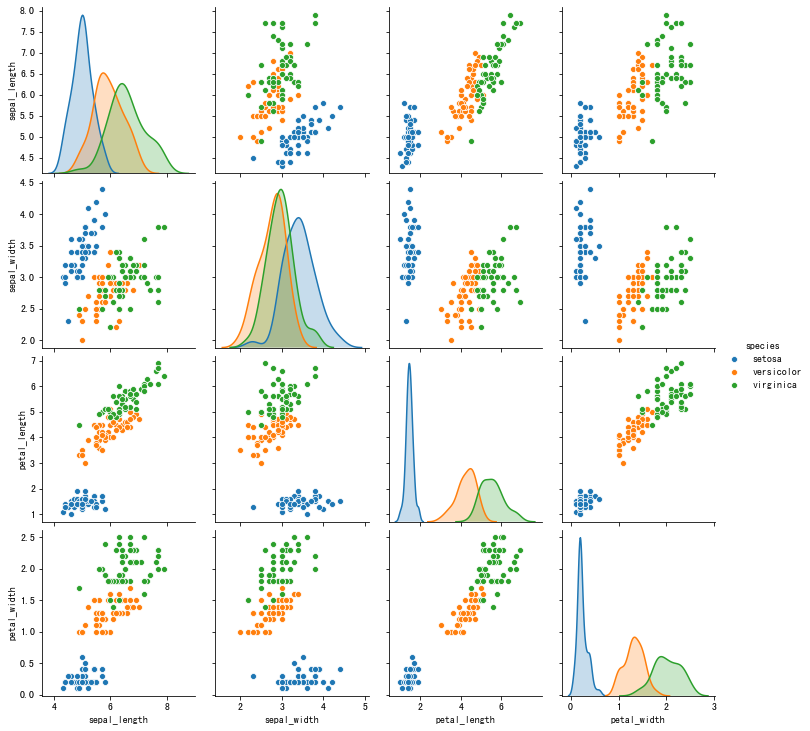

In [7]:
sns.pairplot(iris,hue="species")

In [8]:
# 获得数据集的特征值和目标值
X = iris.values[:,:4]
y = iris.values[:,4]

In [9]:
# 数据集划分
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.5,random_state=0)

In [10]:
train_x.shape

(75, 4)

In [11]:
test_x.shape

(75, 4)

# sklearn 实现鸢尾花

In [12]:
# 使用逻辑回归
# 实例化估计器
lr = LogisticRegressionCV()

In [13]:
# 模型训练
lr.fit(train_x,train_y)

/opt/anaconda3/envs/dlcv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/envs/dlcv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

LogisticRegressionCV()

In [14]:
# 模型评估
lr.score(test_x,test_y)

0.9333333333333333

# tf,keras实现

## 数据处理

In [15]:
# 目标值的热编码
def one_hot_encode(arr):
    # 获取目标值中的所有类别斌进行热编码
    uniques,ids = np.unique(arr,return_inverse=True)
    return utils.to_categorical(ids,len(uniques))

In [16]:
# 对目标值进行编码
train_y_ohe = one_hot_encode(train_y)

In [17]:
test_y_ohe = one_hot_encode(test_y)

## 模型构建

In [18]:
# 通过squential进行构建
model = Sequential([
    # 隐藏层
    Dense(10,activation="relu",input_shape=(4,)),
    # 隐藏层
    Dense(10,activation="relu"),
    # 输出层
    Dense(3,activation="softmax")
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


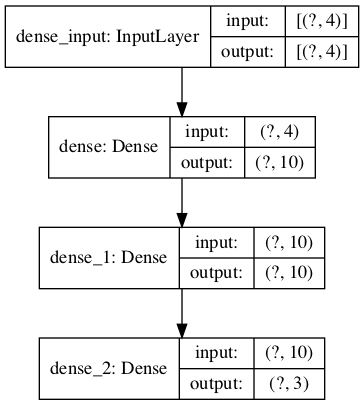

In [20]:
utils.plot_model(model,show_shapes=True)

## 模型预测与评估

In [21]:
# 模型编译
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [22]:
# 类型准换
train_x = np.array(train_x,dtype= np.float32)
test_x = np.array(test_x,dtype=np.float32)

In [23]:
# 模型训练
model.fit(train_x,train_y_ohe,epochs=10,batch_size=1,verbose=1)

Epoch 1/10
75/75 [==============================] - 0s 582us/step - loss: 1.6949 - accuracy: 0.2667
Epoch 2/10
75/75 [==============================] - 0s 498us/step - loss: 1.0696 - accuracy: 0.3867
Epoch 3/10
75/75 [==============================] - 0s 523us/step - loss: 0.7988 - accuracy: 0.7200
Epoch 4/10
75/75 [==============================] - 0s 516us/step - loss: 0.6704 - accuracy: 0.7467
Epoch 5/10
75/75 [==============================] - 0s 480us/step - loss: 0.5823 - accuracy: 0.7733
Epoch 6/10
75/75 [==============================] - 0s 478us/step - loss: 0.5058 - accuracy: 0.8000
Epoch 7/10
75/75 [==============================] - 0s 468us/step - loss: 0.4638 - accuracy: 0.8667
Epoch 8/10
75/75 [==============================] - 0s 489us/step - loss: 0.4091 - accuracy: 0.8533
Epoch 9/10
75/75 [==============================] - 0s 472us/step - loss: 0.3607 - accuracy: 0.9067
Epoch 10/10
75/75 [==============================] - 0s 478us/step - loss: 0.3224 - accuracy: 0.9467

In [30]:
# 模型评估
loss,accuracy = model.evaluate(test_x,test_y_ohe,verbose=1)

3/3 [==============================] - 0s 702us/step - loss: 0.4016 - accuracy: 0.7467


In [31]:
loss

0.4016245901584625

In [32]:
accuracy

0.746666669845581